# Strumenti per la gestione del dato
In questo notebook vedremo le informazioni indispensabili per trattare il dato utilizzando:
- numpy
- pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime

## Numpy
L'oggetto fondamentale di numpy sono gli array multidimensionali.
Gli array hanno gli elementi di tipo omogeneo e sono indicizzati da numeri interi (come le liste python).

### crezione array

In [3]:
a = np.array(range(15))
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
np.ones((2, 3, 4), dtype=np.int16)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]], dtype=int16)

### shape

In [6]:
a.shape

(15,)

In [7]:
a = a.reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
a.shape

(3, 5)

### dtype

In [9]:
a.dtype

dtype('int32')

### basic operations
Le operazioni base sono **elementwise**

In [10]:
A = np.array([[1, 1],
              [0, 1]])
B = np.array([[2, 0],
              [3, 4]])

In [11]:
A * B     # elementwise product

array([[2, 0],
       [0, 4]])

In [12]:
A + B     # elementwise sum

array([[3, 1],
       [3, 5]])

In [13]:
A.dot(B)  # matrix product

array([[5, 4],
       [3, 4]])

In [14]:
A @ B     # matrix product

array([[5, 4],
       [3, 4]])

### indexing mono-dimensionale 
Fuziona come l'indicizzazione delle liste python

In [15]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729], dtype=int32)

In [16]:
a[2]

8

In [17]:
a[2:5]

array([ 8, 27, 64], dtype=int32)

In [18]:
# from start to position 6, exclusive, set every 2nd element to 1000
a[:6:2]

array([ 0,  8, 64], dtype=int32)

In [19]:
a[::-1]  # reversed a

array([729, 512, 343, 216, 125,  64,  27,   8,   1,   0], dtype=int32)

### indexing multi-dimensionale 
Fuziona come l'indicizzazione delle liste python

In [20]:
def f(x, y):
    return 10 * x + y

b = np.fromfunction(f, (5, 4), dtype=int)
b

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [21]:
b[2, 3] # element where row = 2, column = 3

23

In [22]:
b[:, 1]  # each row in the second column of b

array([ 1, 11, 21, 31, 41])

In [23]:
b[1:3, :]  # each column in the second and third row of b

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

### Copies vs Views

#### No copy for assignments and function calls

In [24]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])
b = a            # no new object is created
b is a           # a and b are two names for the same ndarray object

True

#### Views and Shallow Copy

In [25]:
c = a.view()
c

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
c is a

False

In [27]:
c.flags.owndata

False

In [28]:
c.base is a            # c is a view of the data owned by a

True

In [29]:
c = c.reshape((2, 6))  # a's shape doesn't change
a.shape

(3, 4)

In [30]:
c[0, 4] = 1234         # a's data changes
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

**Attenzione: lo Slicing di un restituisce una sua vista!!!**

In [31]:
s = a[:, 1:3]
s.flags.owndata

False

#### Deep Copy

In [32]:
d = a.copy()  # a new array object with new data is created
d is a

False

In [33]:
d.base is a  # d doesn't share anything with a

False

In [34]:
d[0, 0] = 9999
a

array([[   0,    1,    2,    3],
       [1234,    5,    6,    7],
       [   8,    9,   10,   11]])

## Pandas
Pandas è un modulo molto flessibile per analisi e manipolazione dei dati, costruito al di sopra di numpy, del quale eredita buona parte delle caratteristiche.

Tutte le considerazioni fatte sopra per numpy, si applicano anche alle strutture dati di pandas.

### Strutture dati
Le strutture dati principali sono:
- Series: array monodimensionali, etichettati e indicizzati. Gli elementi sono tutti dello stesso tipo (si può generalizzate con *object*)
- Dataframe: matrici bidimensionali, con colonne potenzialmente di tipo diverso. Sia le righe che le colonne sono etichettate e indicizzate.

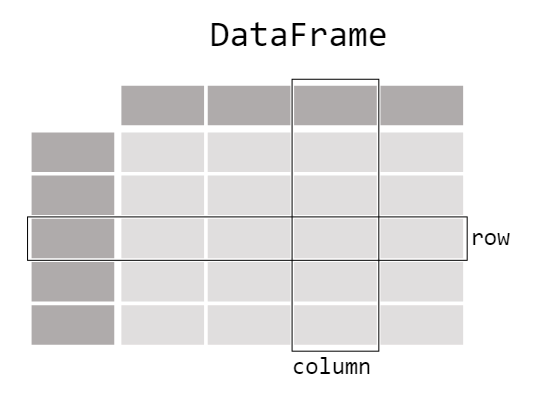

In [35]:
# Series 
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a    1.635483
b    0.238647
c   -1.278675
d   -0.874882
e    0.107569
dtype: float64

In [36]:
# DataFrame
index = pd.date_range("1/1/2000", periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])
df

,A,B,C
2000-01-01,0.979042,-0.033734,1.515242
2000-01-02,-0.943729,-1.450667,0.468487
2000-01-03,0.254668,0.240142,-1.081223
2000-01-04,-0.802006,0.246257,-0.182341
2000-01-05,-1.436406,-2.498902,-0.922265
2000-01-06,0.258133,0.191648,1.552846
2000-01-07,-1.055964,0.565125,-1.889738
2000-01-08,0.931920,-0.317318,0.041580


### Basic Functionality
Verranno mostrate sui DataFrame ma in buona parte sono utilizzabili anche sulle Series.

- shape
- head
- tail
- describe
- info (solo DF)
- value_counts
- select_dtypes

In [37]:
# shape
df.shape

(8, 3)

In [38]:
# head
df.head(2)

,A,B,C
2000-01-01,0.979042,-0.033734,1.515242
2000-01-02,-0.943729,-1.450667,0.468487


In [39]:
# tail
df.tail(2)

,A,B,C
2000-01-07,-1.055964,0.565125,-1.889738
2000-01-08,0.931920,-0.317318,0.041580


In [40]:
# describe
df.describe()

,A,B,C
count,8.000000,8.000000,8.000000
mean,-0.226793,-0.382181,-0.062177
std,0.945604,1.052662,1.226001
min,-1.436406,-2.498902,-1.889738
25%,-0.971788,-0.600656,-0.962005
50%,-0.273669,0.078957,-0.070381
75%,0.426580,0.241670,0.730176
max,0.979042,0.565125,1.552846


In [41]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2000-01-01 to 2000-01-08
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       8 non-null      float64
 1   B       8 non-null      float64
 2   C       8 non-null      float64
dtypes: float64(3)
memory usage: 256.0 bytes


In [42]:
# value_counts on a DataFrame
df.value_counts()

A          B          C        
-1.436406  -2.498902  -0.922265    1
-1.055964   0.565125  -1.889738    1
-0.943729  -1.450667   0.468487    1
-0.802006   0.246257  -0.182341    1
 0.254668   0.240142  -1.081223    1
 0.258133   0.191648   1.552846    1
 0.931920  -0.317318   0.041580    1
 0.979042  -0.033734   1.515242    1
dtype: int64

In [43]:
# value_counts on a Series
df["A"].value_counts()

 0.979042    1
-0.943729    1
 0.254668    1
-0.802006    1
-1.436406    1
 0.258133    1
-1.055964    1
 0.931920    1
Name: A, dtype: int64

In [44]:
# select_dtypes -> per ottenere solo le colonne object (che solitamente sono le features categoriche)
df.select_dtypes(include=[object])

""
2000-01-01
2000-01-02
2000-01-03
2000-01-04
2000-01-05
2000-01-06
2000-01-07
2000-01-08


In [45]:
# select_dtypes -> per escludere le colonne object (e ottenere quindi solo le colonne numeriche)
df.select_dtypes(exclude=[object])

,A,B,C
2000-01-01,0.979042,-0.033734,1.515242
2000-01-02,-0.943729,-1.450667,0.468487
2000-01-03,0.254668,0.240142,-1.081223
2000-01-04,-0.802006,0.246257,-0.182341
2000-01-05,-1.436406,-2.498902,-0.922265
2000-01-06,0.258133,0.191648,1.552846
2000-01-07,-1.055964,0.565125,-1.889738
2000-01-08,0.931920,-0.317318,0.041580


### Indexing
Questa è una delle funzionalità più importanti di pandas.
Esistono moltissimi modi per selezionare le porzioni dei DataFrame che ci interessano, eccone riportate alcune:

| Operation                                   | Syntax                         | Result    |
|---------------------------------------------|--------------------------------|-----------|
| Select column                               | df[col]                        | Series    |
| Select multiple columns                     | df[[c_list]]                   | DataFrame |
| Select row by label                         | df.loc[label]                  | Series    |
| Select row by integer location              | df.iloc[loc]                   | Series    |
| Slice rows                                  | df[5:10]                       | DataFrame |
| Select rows by boolean vector               | df[bool_vec]                   | DataFrame |
| Select rows and columns by label            | df.loc[[r_labels], [c_labels]] | DataFrame |
|                                             | df.loc[[r_bool_vec], [c_bool_vec]] |           |
| Select rows and columns by integer location | df.iloc[[r_loc], [c_loc]]      | DataFrame |

Inoltre tutte le combinazioni, su righe e colonne, delle sintassi precedenti risultano valide.


**Attenzione: siccome dietro le quinte viene usato Numpy occorre prestare attenzione al discorso `view vs copy`.
In particolare è noto il fenomeno del `chained assignment` (maggiori dettagli [qui](https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25))**

In [46]:
df

,A,B,C
2000-01-01,0.979042,-0.033734,1.515242
2000-01-02,-0.943729,-1.450667,0.468487
2000-01-03,0.254668,0.240142,-1.081223
2000-01-04,-0.802006,0.246257,-0.182341
2000-01-05,-1.436406,-2.498902,-0.922265
2000-01-06,0.258133,0.191648,1.552846
2000-01-07,-1.055964,0.565125,-1.889738
2000-01-08,0.931920,-0.317318,0.041580


In [47]:
df["B"]

2000-01-01   -0.033734
2000-01-02   -1.450667
2000-01-03    0.240142
2000-01-04    0.246257
2000-01-05   -2.498902
2000-01-06    0.191648
2000-01-07    0.565125
2000-01-08   -0.317318
Freq: D, Name: B, dtype: float64

In [48]:
df.loc["2000-01-04"]

A   -0.802006
B    0.246257
C   -0.182341
Name: 2000-01-04 00:00:00, dtype: float64

In [49]:
df.loc[datetime(2000,1,4)]

A   -0.802006
B    0.246257
C   -0.182341
Name: 2000-01-04 00:00:00, dtype: float64

In [50]:
df.loc[:, "B"]

2000-01-01   -0.033734
2000-01-02   -1.450667
2000-01-03    0.240142
2000-01-04    0.246257
2000-01-05   -2.498902
2000-01-06    0.191648
2000-01-07    0.565125
2000-01-08   -0.317318
Freq: D, Name: B, dtype: float64

In [51]:
# Select rows and columns by label 
df.loc[["2000-01-04", "2000-01-08"], ["A", "B"]]

,A,B
2000-01-04,-0.802006,0.246257
2000-01-08,0.931920,-0.317318


In [52]:
# Select rows by boolean vector
r_bool_vec = df.index.weekday == 5 # sabato
r_bool_vec

array([ True, False, False, False, False, False, False,  True])

In [53]:
c_bool_vec = df.columns == "A"
c_bool_vec

array([ True, False, False])

In [54]:
df.loc[r_bool_vec, c_bool_vec]

,A
2000-01-01,0.979042
2000-01-08,0.931920


In [55]:
# Select rows and columns by integer location
df.iloc[range(1,8,2), [1,2]]  

,B,C
2000-01-02,-1.450667,0.468487
2000-01-04,0.246257,-0.182341
2000-01-06,0.191648,1.552846
2000-01-08,-0.317318,0.041580


#### Selezione
Usare l'indicizzazione per eseguire delle query (o degli assegnamenti)!

In [56]:
df[
    df["A"] > 0
]

,A,B,C
2000-01-01,0.979042,-0.033734,1.515242
2000-01-03,0.254668,0.240142,-1.081223
2000-01-06,0.258133,0.191648,1.552846
2000-01-08,0.931920,-0.317318,0.041580


In [57]:
df[
    df["A"] <= 0
]

,A,B,C
2000-01-02,-0.943729,-1.450667,0.468487
2000-01-04,-0.802006,0.246257,-0.182341
2000-01-05,-1.436406,-2.498902,-0.922265
2000-01-07,-1.055964,0.565125,-1.889738


### Assegnamento
La modifica dei valori all'interno di un dataframe si può effettuare esattamente allo stesso modo in cui viene fatto l'indexing / selezione. 

In [58]:
df["B"] = 99
df

,A,B,C
2000-01-01,0.979042,99,1.515242
2000-01-02,-0.943729,99,0.468487
2000-01-03,0.254668,99,-1.081223
2000-01-04,-0.802006,99,-0.182341
2000-01-05,-1.436406,99,-0.922265
2000-01-06,0.258133,99,1.552846
2000-01-07,-1.055964,99,-1.889738
2000-01-08,0.931920,99,0.041580


##### attenzione al chained assignment 
Se si vuole modificare il DataFrame originale -> usare `.loc`

Se si vuole lavorare su un sottoinsieme dei dati (senza modificare i dati originali) -> esplicitare il metodo `copy()`

Maggiori dettagli [qui](https://towardsdatascience.com/explaining-the-settingwithcopywarning-in-pandas-ebc19d799d25).

In [59]:
## Attenzione questo potrebbe non essere il comportamento atteso!!

df[
    df["A"] <= 0
]["B"] = 5

df

D:\Users\feder\AppData\Local\Temp/ipykernel_25820/1222363819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[


,A,B,C
2000-01-01,0.979042,99,1.515242
2000-01-02,-0.943729,99,0.468487
2000-01-03,0.254668,99,-1.081223
2000-01-04,-0.802006,99,-0.182341
2000-01-05,-1.436406,99,-0.922265
2000-01-06,0.258133,99,1.552846
2000-01-07,-1.055964,99,-1.889738
2000-01-08,0.931920,99,0.041580


In [60]:
# fare una copia se occorre lavorare su un sottoinsieme dei dati senza modificare il dataframe originale
dfx = df[
    df["A"] > 0
].copy()

dfx["B"] = 5

dfx

,A,B,C
2000-01-01,0.979042,5,1.515242
2000-01-03,0.254668,5,-1.081223
2000-01-06,0.258133,5,1.552846
2000-01-08,0.931920,5,0.041580


In [61]:
df

,A,B,C
2000-01-01,0.979042,99,1.515242
2000-01-02,-0.943729,99,0.468487
2000-01-03,0.254668,99,-1.081223
2000-01-04,-0.802006,99,-0.182341
2000-01-05,-1.436406,99,-0.922265
2000-01-06,0.258133,99,1.552846
2000-01-07,-1.055964,99,-1.889738
2000-01-08,0.931920,99,0.041580


In [62]:
# usare .loc per modificare il dataframe originale
df.loc[df["A"] > 0, "B"] = 5
df

,A,B,C
2000-01-01,0.979042,5,1.515242
2000-01-02,-0.943729,99,0.468487
2000-01-03,0.254668,5,-1.081223
2000-01-04,-0.802006,99,-0.182341
2000-01-05,-1.436406,99,-0.922265
2000-01-06,0.258133,5,1.552846
2000-01-07,-1.055964,99,-1.889738
2000-01-08,0.931920,5,0.041580


### IO
Un altro insieme di funzionalità molto utili di pandas riguardano l'IO. Infatti ha la possibilità di leggere e scrivere moltissimi formati di dati per archiviare i DataFrame.

Rimando alla [documentazione ufficiale](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) per tutti i dettagli e riporto qui solo alcuni esempi

#### CSV

In [63]:
df.to_csv("../data/sample.csv")

In [64]:
df2 = pd.read_csv("../data/sample.csv", index_col=0)
df2

,A,B,C
2000-01-01,0.979042,5,1.515242
2000-01-02,-0.943729,99,0.468487
2000-01-03,0.254668,5,-1.081223
2000-01-04,-0.802006,99,-0.182341
2000-01-05,-1.436406,99,-0.922265
2000-01-06,0.258133,5,1.552846
2000-01-07,-1.055964,99,-1.889738
2000-01-08,0.931920,5,0.041580


#### EXCEL

In [65]:
df.to_excel("../data/sample.xlsx")

In [66]:
df2 = pd.read_excel("../data/sample.xlsx", index_col=0)
df2

,A,B,C
2000-01-01,0.979042,5,1.515242
2000-01-02,-0.943729,99,0.468487
2000-01-03,0.254668,5,-1.081223
2000-01-04,-0.802006,99,-0.182341
2000-01-05,-1.436406,99,-0.922265
2000-01-06,0.258133,5,1.552846
2000-01-07,-1.055964,99,-1.889738
2000-01-08,0.931920,5,0.041580
